# Ensemble Learning

Ensemble learning is the process by which multiple models, such as classifiers or experts, are strategically generated and combined to solve a particular computational intelligence problem. Ensemble learning is primarily used to improve the (classification, prediction, function approximation, etc.)  

**Ensemble Learning, in simple terms, It is nothing but a collective learning model. Instead of a single machine learning model or algorithm, we combine the results of several machine learning models in order to get the final prediction results.**

## Ensemble Techniques

* Max Voting.  
* Averaging.  
* Weighted Averaging.  

## Max Voting  

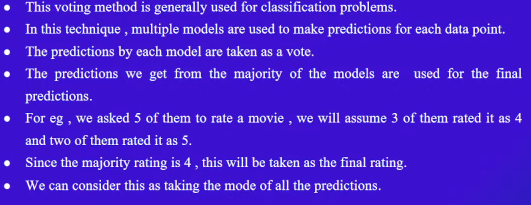

## Averaging  

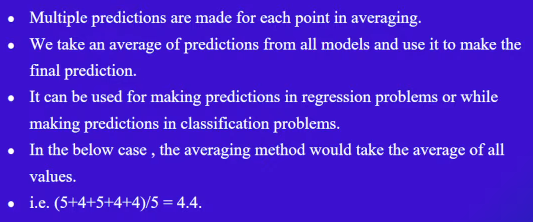

## Weighted Average

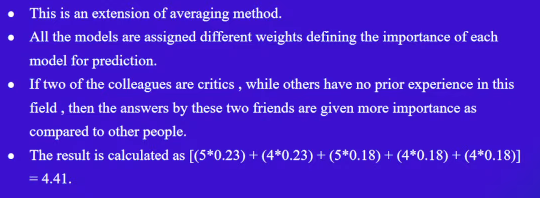

## Bagging

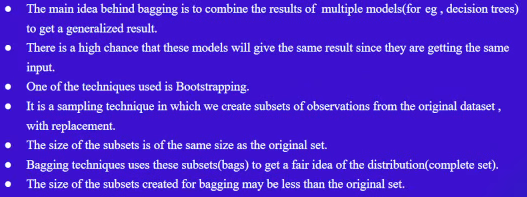  

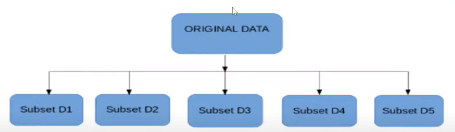

## Boosting

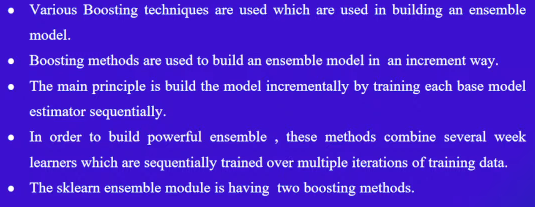  

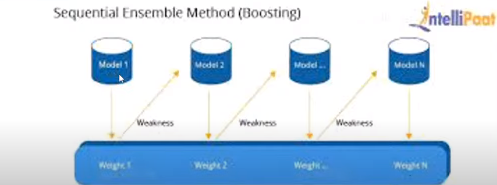  


* **AdaBoost is one of the powerful boosting ensemble method.**  
* The main key is in the way they give weights to the instances in the dataset.  
* The algorithm needs to pay less attension to the instances while constructing subsequent models.  

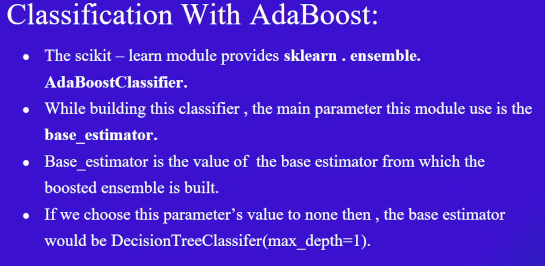  

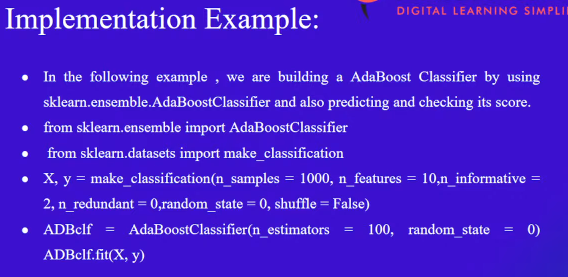  

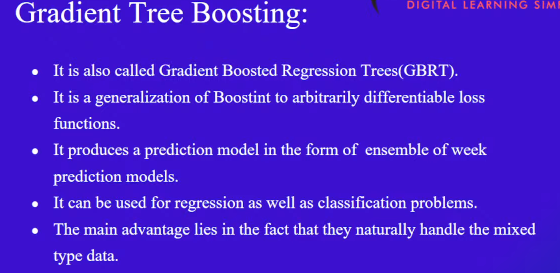  

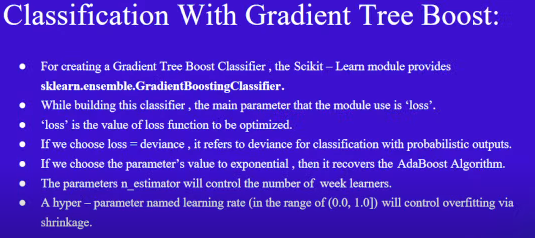

# XGBoost

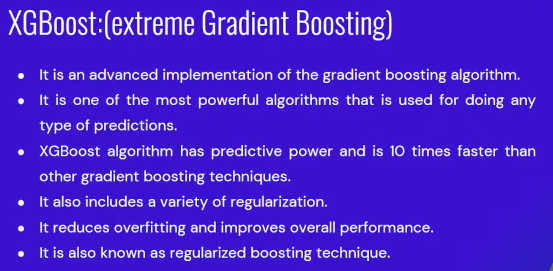  

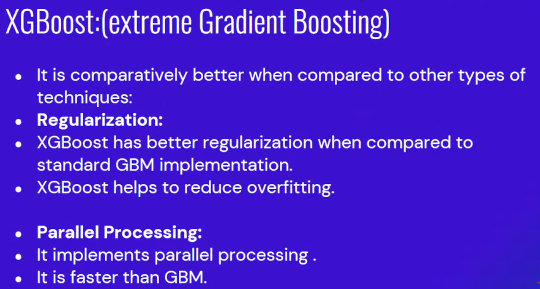  

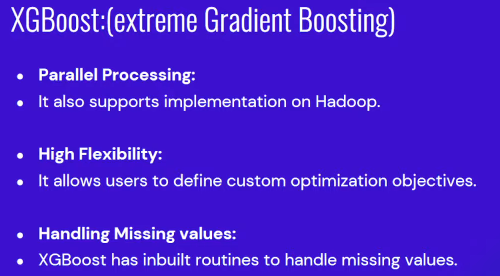  

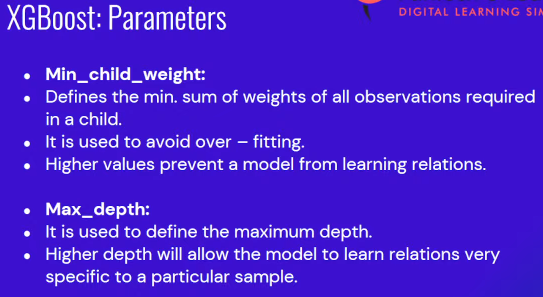  

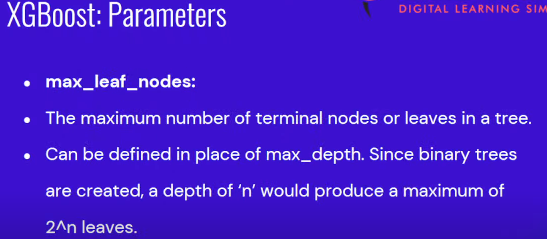

# Loan Approval Prediction Problem - XGBoost

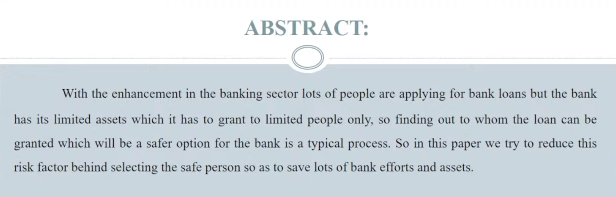  

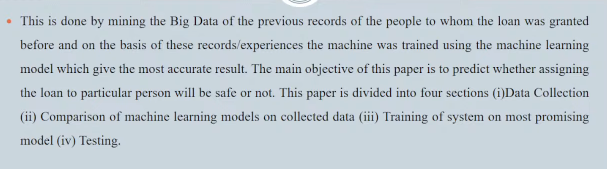  

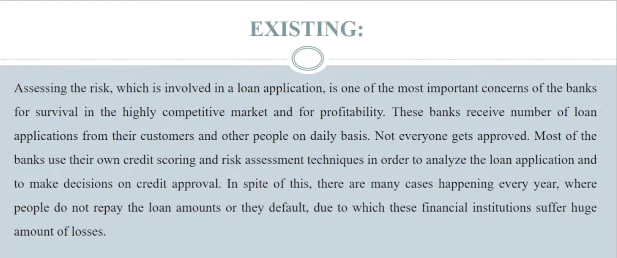  

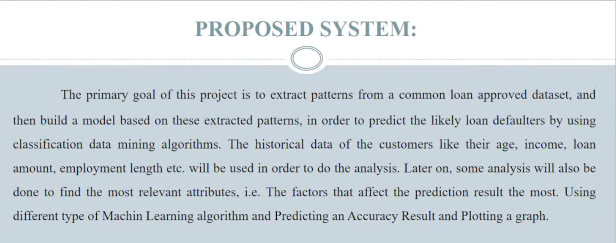

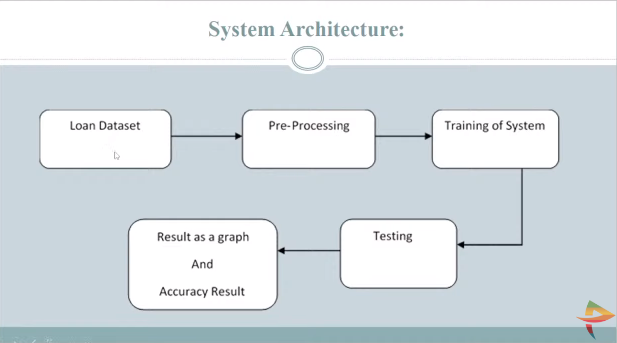

# Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Pre Processing

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(614, 13)

In [6]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df1 = df.dropna()

In [9]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Text(0, 0.5, 'No. of App')

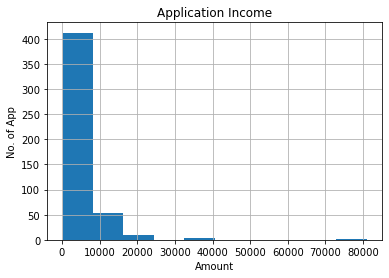

In [10]:
df1['ApplicantIncome'].hist(bins=10)

plt.title("Application Income")
plt.xlabel('Amount')
plt.ylabel('No. of App')

Text(0, 0.5, 'No. of CoApp')

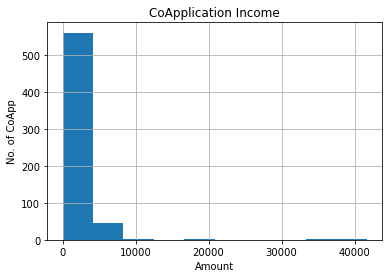

In [11]:
df['CoapplicantIncome'].hist(bins=10)
plt.title("CoApplication Income")
plt.xlabel('Amount')
plt.ylabel('No. of CoApp')

Text(0, 0.5, 'No. of CoApp')

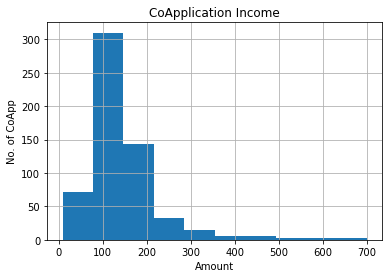

In [12]:
df['LoanAmount'].hist(bins=10)
plt.title("CoApplication Income")
plt.xlabel('Amount')
plt.ylabel('No. of CoApp')

<AxesSubplot:xlabel='Gender'>

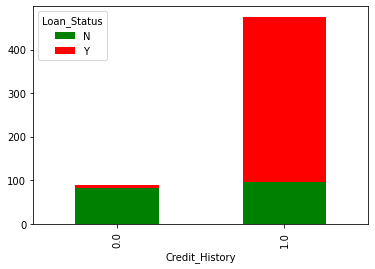

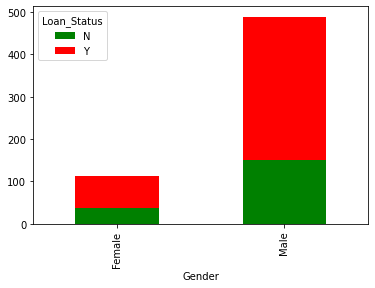

In [13]:
# combining the above 2 plots in a stacked chart

stack_chart = pd.crosstab(df['Credit_History'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green', 'red'], grid=False)
stack_chart = pd.crosstab(df['Gender'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green', 'red'], grid=False)

Text(0.5, 0, 'Amount')

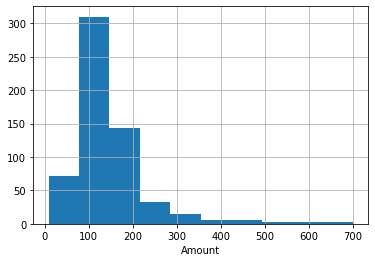

In [14]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount'].hist(bins=10)
plt.xlabel('Amount')

In [15]:
df2 = df1.drop(['Loan_ID'], axis=1)

## LabelEncoder

In [16]:
from sklearn import  preprocessing
le = preprocessing.LabelEncoder()

In [17]:
df2['LGender'] = le.fit_transform(df2['Gender'].values.reshape(-1,1).ravel())

df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LGender
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1


In [18]:
df2['LMarried'] = le.fit_transform(df2['Married'].values.reshape(-1,1).ravel())

df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LGender,LMarried
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1


In [19]:
df2['LSelf_Emmployed'] = le.fit_transform(df2['Self_Employed'].values.reshape(-1,1).ravel())

df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LGender,LMarried,LSelf_Emmployed
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,1


In [20]:
df2['LLoan_Status'] = le.fit_transform(df2['Loan_Status'].values.reshape(-1,1).ravel())

df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LGender,LMarried,LSelf_Emmployed,LLoan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,1,1


In [21]:
df2['LEducation'] = le.fit_transform(df2['Education'].values.reshape(-1,1).ravel())

df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LGender,LMarried,LSelf_Emmployed,LLoan_Status,LEducation
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1,0
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,1,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1,0
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,1,1,0


In [22]:
df2['LProperty_Area'] = le.fit_transform(df2['Property_Area'].values.reshape(-1,1).ravel())

df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LGender,LMarried,LSelf_Emmployed,LLoan_Status,LEducation,LProperty_Area
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,0,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1,0,2
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,1,1,2
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1,0,2
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,1,1,0,2


In [23]:
df2 = df2.drop(["Self_Employed"], axis=1)
df2 = df2.drop(["Loan_Status"], axis=1)
df2 = df2.drop(["Property_Area"], axis=1)
df2 = df2.drop(["Married"], axis=1)
df2 = df2.drop(["Gender"], axis=1)
df2 = df2.drop(["Education"], axis=1)

In [24]:
df2.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LGender,LMarried,LSelf_Emmployed,LLoan_Status,LEducation,LProperty_Area
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,1,1,0,2
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,1,1,2
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,2
5,2.0,5417,4196.0,267.0,360.0,1.0,1,1,1,1,0,2


## Classification

In [25]:
X = df2.iloc[:, df2.columns != 'LLoan_Status']
y = df2.iloc[:, df2.columns == 'LLoan_Status']

In [26]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LGender,LMarried,LSelf_Emmployed,LEducation,LProperty_Area
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,1,0,2
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,1,2
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,2
5,2.0,5417,4196.0,267.0,360.0,1.0,1,1,1,0,2


In [27]:
y.head()

,LLoan_Status
1,0
2,1
3,1
4,1
5,1


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
X_train.shape

(336, 11)

In [31]:
y_test.shape

(144, 1)

In [32]:
np1 = df2.values

# Training The Algorithms

## 1. SVM: Support Vector Machine

In [35]:
from sklearn import svm

model_1 = svm.SVC()

In [45]:
model_1.fit(X_train, y_train.values.ravel())

SVC()

In [46]:
svm = model_1.score(X_test, y_test)

svm

0.7083333333333334

## 2. Linear Model: Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression()

In [43]:
model_2.fit(X_train, y_train)

LinearRegression()

In [44]:
lr = model_2.score(X_test, y_test)
lr

0.24381331876429546

## Graph_Comparision

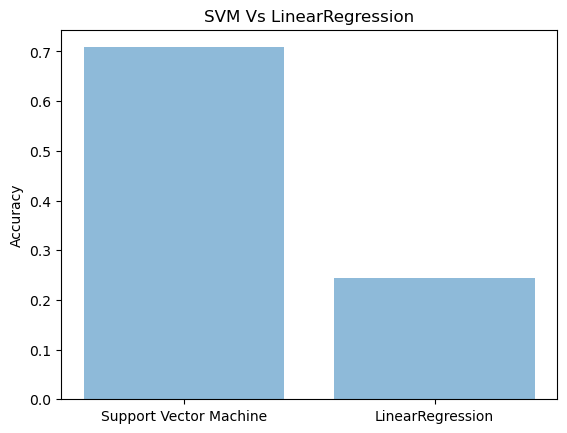

In [50]:
import matplotlib.pyplot as plt
plt.rcdefaults()

objects = ('Support Vector Machine', 'LinearRegression')
y_pos = np.arange(len(objects))
performance = [svm, lr]

plt.bar(y_pos,  performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('SVM Vs LinearRegression')

plt.show()